Short Summary

Basically I am doing a comparitive experiment. The imputation methods applied include mean imputation, tree imputation, cluster imputation. By controling the percentage of each mechanism, w

# Introducing Dataset

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
concrete_compressive_strength = fetch_ucirepo(id=45)
  
# data (as pandas dataframes) 
# X = concrete_compressive_strength.data.features
# y = concrete_compressive_strength.data.targets 
original_df = concrete_compressive_strength.data.original

In [3]:
original_df.shape

(303, 14)

In [4]:
pd.isna(original_df).sum().sum()

6

In [13]:
pd.isna(original_df).sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

In [6]:
original_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [39]:
original_df[original_df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [14]:
set(original_df["num"]) # It is integer valued from 0 (no presence) to 4. 

{0, 1, 2, 3, 4}

In [41]:
set(original_df['thal'])
# thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

{3.0, 6.0, 7.0, nan, nan}

In [56]:
set(original_df['ca'])
# ca: number of major vessels (0-3) colored

{0.0, 1.0, 2.0, 3.0, nan, nan, nan, nan}

In [3]:
df = original_df.copy()
df.loc[df[(df['num'] > 0)].index.tolist(),'num'] = 1

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


# Experiment

## Complete Case

In [5]:
dropped_df = df.dropna()
dropped_df.shape

(297, 14)

### XGBOOST

In [6]:
import xgboost as xgb

In [7]:
X = dropped_df.drop('num', axis=1)
y = dropped_df['num']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

c:\ProgramData\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:36:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [10]:
y_pred = model.predict(X_test)

In [11]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.33%


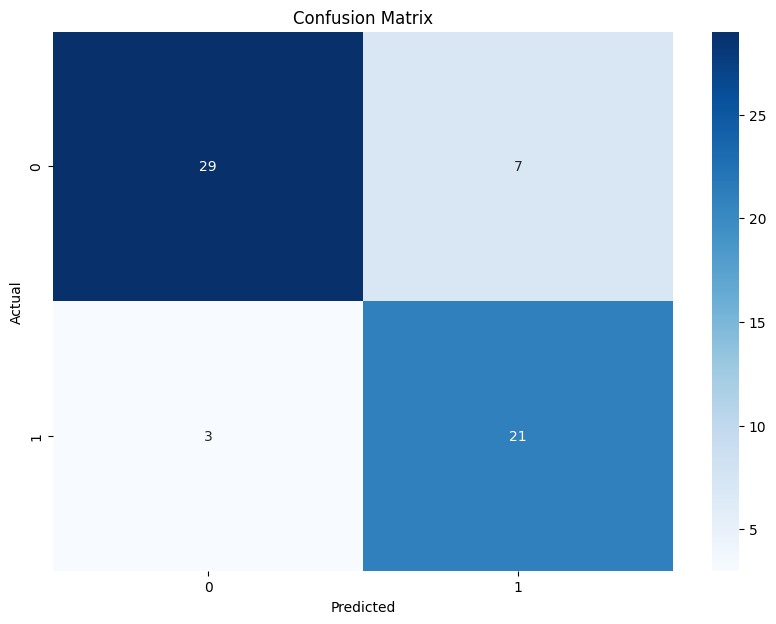

In [12]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Imputing the original data set

### MEAN/MODE

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
# Initialize the SimpleImputer with strategy='most_frequent'
imputer = SimpleImputer(strategy='most_frequent')

# df_without_ca = df.drop(columns=['ca'])
thal = pd.DataFrame(df['thal'])

# Fit and transform the data
thal_imputed = pd.DataFrame(imputer.fit_transform(thal), columns=thal.columns)
# print("\nData After Imputation:\n", df_imputed)

In [15]:
# Impute missing values with the mean of each column
df_imputed = df.apply(lambda x: x.fillna(x.mean()), axis=0)

In [16]:
df_imputed['thal'] = thal_imputed

In [17]:
df_imputed[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.000000,3.0,0
166,52,1,3,138,223,0,0,169,0,0.0,1,0.672241,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,0.672241,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.000000,3.0,1
287,58,1,2,125,220,0,0,144,0,0.4,2,0.672241,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,0.672241,3.0,0


In [18]:
X = df_imputed.drop('num', axis=1)
y = df_imputed['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 85.25%


c:\ProgramData\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


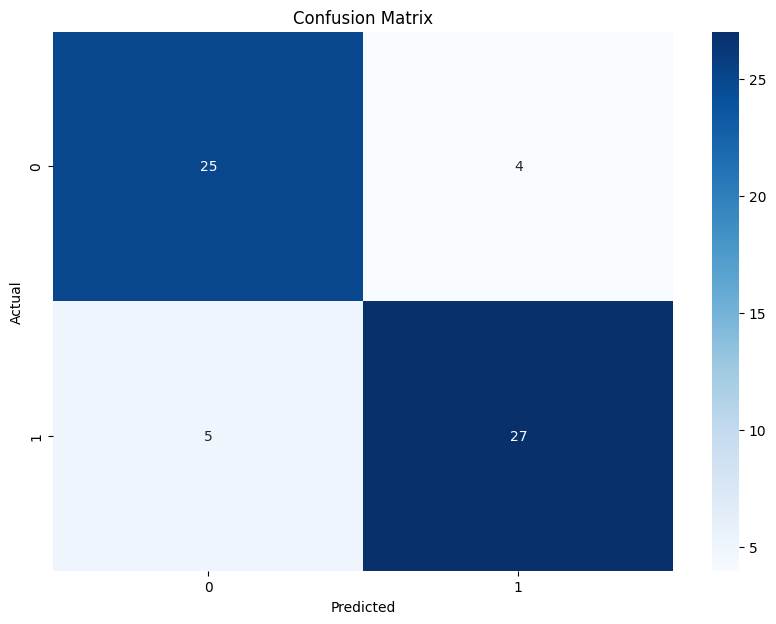

In [19]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### KNN

In [22]:
from sklearn.impute import KNNImputer

In [23]:
# Initialize the KNNImputer
imputer = KNNImputer(n_neighbors=2)

# Perform the imputation
imputed_data = imputer.fit_transform(df)
imputed_df = pd.DataFrame(imputed_data, columns=df.columns)

In [24]:
X = imputed_df.drop('num', axis=1)
y = imputed_df['num']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.97%


c:\ProgramData\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:38:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [25]:
imputed_df[df.isna().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,5.0,0.0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,1.0,3.0,0.0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,1.0,7.0,1.0
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,3.0,1.0
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,1.0,7.0,0.0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,0.0,3.0,0.0


In [26]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 81.97%


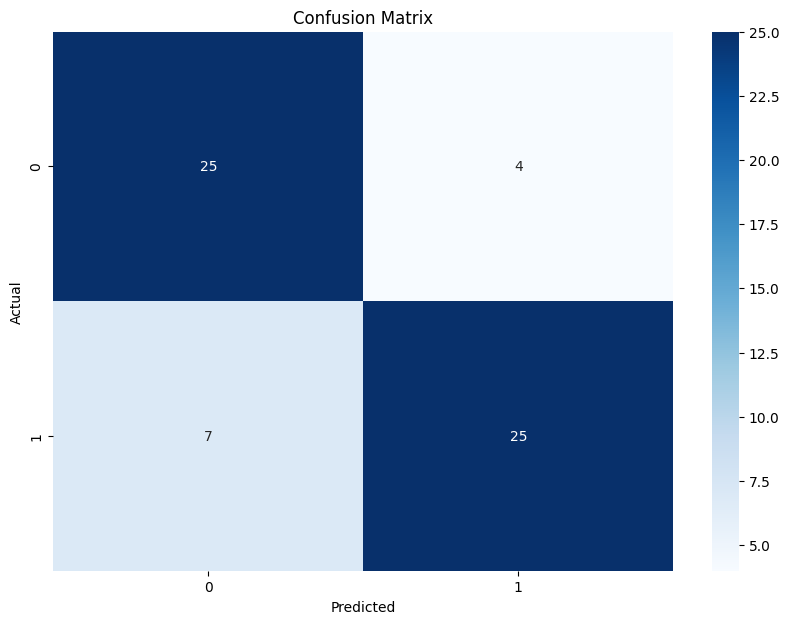

In [27]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(2), yticklabels=range(2))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generating NULL values in dataset completely at random
As instructed, I start from investigating how to deal with data missing at completely random, which does not depend any observable information in the dataset.
Then, I generated some null values in the dataset with these proportion: 10%, 20%, 30%, 40%, 50%

In [4]:
def gen_p(length, width):
    return (np.random.randint(0, length), np.random.randint(0, width))

In [5]:
def insert_null(ratio, dataframe):
    

    # Number of null values to insert
    num_nulls = int(ratio * (dataframe.size))

    temp_df = dataframe.copy()

    # Randomly choose positions to insert null values
    idx_pair = []

    for _ in range(num_nulls):
        
        p = gen_p(temp_df.shape[0], temp_df.shape[1])
        while p in idx_pair: p = gen_p(temp_df.shape[0], temp_df.shape[1])
        idx_pair.append(p)
        temp_df.iat[p[0], p[1]] = np.nan
    
    return temp_df, pd.isna(temp_df)

In [6]:
ratio = 0.1
df10, df10_idx = insert_null(ratio, df)

In [90]:
pd.isna(df10).sum().sum()

927

In [7]:
ratio = 0.2
df20, df20_idx = insert_null(ratio, df)

In [92]:
pd.isna(df20).sum().sum()

1854

In [8]:
ratio = 0.3
df30, df30_idx = insert_null(ratio, df)

In [94]:
pd.isna(df30).sum().sum()

2781

In [9]:
ratio = 0.4
df40, df40_idx = insert_null(ratio, df)

In [97]:
pd.isna(df40).sum().sum()

3708

In [10]:
ratio = 0.5
df50, df50_idx = insert_null(ratio, df)

In [99]:
pd.isna(df50).sum().sum()

4635

# Some attempts for recovering these missing values

In [202]:
# mean imputation
def mean_imputation(missing_df, missing_df_idx):
    imputed_df = missing_df.copy()
    for col in imputed_df:
        imputed_value = round(imputed_df[col].mean(), 1)
        imputed_df[col][missing_df_idx[col]] = imputed_value
    return imputed_df

In [209]:
mean_imputed_df10 = mean_imputation(df10, df10_idx)
mean_imputed_df20 = mean_imputation(df20, df20_idx)
mean_imputed_df30 = mean_imputation(df30, df30_idx)
mean_imputed_df40 = mean_imputation(df40, df40_idx)
mean_imputed_df50 = mean_imputation(df50, df50_idx)

In [204]:
# median imputation
def median_imputation(missing_df, missing_df_idx):
    imputed_df = missing_df.copy()
    for col in imputed_df:
        imputed_value = round(imputed_df[col].median(), 1)
        imputed_df[col][missing_df_idx[col]] = imputed_value
    return imputed_df

In [210]:
median_imputed_df10 = median_imputation(df10, df10_idx)
median_imputed_df20 = median_imputation(df20, df20_idx)
median_imputed_df30 = median_imputation(df30, df30_idx)
median_imputed_df40 = median_imputation(df40, df40_idx)
median_imputed_df50 = median_imputation(df50, df50_idx)

# Evaluation
metric measure used : NRMSE

Mean of Normalized RMSE (NRMSE) as a performance indicator

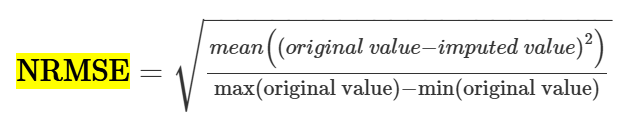

using Normalized RMSE is that scales are different for different features of the dataset

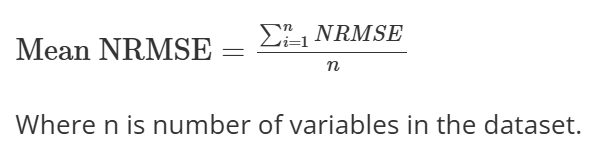

In [190]:
def evaluate(original_df, missing_df_idx, imputed_df):
    ori = original_df[missing_df_idx]
    imp = imputed_df[missing_df_idx]

    diff = ori - imp

    numerator = (diff ** 2).mean()
    denominator = ori.max() - ori.min()

    NRMSE = round(np.sqrt(numerator.div(denominator)), 2)
    return NRMSE, round(NRMSE.mean(), 2)

In [216]:
metric, avg_metric = evaluate(df, df10_idx, mean_imputed_df10)
print(metric, avg_metric)

metric, avg_metric = evaluate(df, df10_idx, median_imputed_df10)
print(metric, avg_metric)

Cement                           5.33
Blast Furnace Slag               5.15
Fly Ash                          4.97
Water                            1.95
Superplasticizer                 1.19
Coarse Aggregate                 4.29
Fine Aggregate                   4.24
Age                              3.38
Concrete compressive strength    1.96
dtype: float64 3.61
Cement                           5.33
Blast Furnace Slag               6.09
Fly Ash                          6.65
Water                            1.99
Superplasticizer                 1.19
Coarse Aggregate                 4.25
Fine Aggregate                   4.27
Age                              3.47
Concrete compressive strength    2.00
dtype: float64 3.92


In [212]:
metric, avg_metric = evaluate(df, df20_idx, mean_imputed_df20)
print(avg_metric)

metric, avg_metric = evaluate(df, df20_idx, median_imputed_df20)
print(avg_metric)

3.5
3.71


In [213]:
metric, avg_metric = evaluate(df, df30_idx, mean_imputed_df30)
print(avg_metric)

metric, avg_metric = evaluate(df, df30_idx, median_imputed_df30)
print(avg_metric)

3.47
3.74


In [214]:
metric, avg_metric = evaluate(df, df40_idx, mean_imputed_df40)
print(avg_metric)

metric, avg_metric = evaluate(df, df40_idx, median_imputed_df40)
print(avg_metric)

3.43
3.73


In [215]:
metric, avg_metric = evaluate(df, df50_idx, mean_imputed_df50)
print(avg_metric)

metric, avg_metric = evaluate(df, df50_idx, median_imputed_df50)
print(avg_metric)

3.4
3.68


No sigificant difference between these two approaches no matter what the missing proportion is.

# Setting 